In [1]:
import sys
if '..' not in sys.path:
    sys.path.append('..')

In [2]:
%matplotlib inline
from tqdm import tqdm
import seaborn as sns
from collections import Counter
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

## Read in results

In [29]:
from collections import OrderedDict
paths = OrderedDict([
    ('baselines', '../output/baselines-results.csv'),
    ('sieve', '../output/stanford-sieve-results.csv'),
#     ('e2e', '../output/e2e/results.csv'),
    ('cort', '../output/cort/results.csv'),
    ('stduents', '../output/mturk/students-results.csv')
])

In [30]:
import pandas as pd
name2ret = OrderedDict((name, pd.read_csv(path)) for name, path in paths.items())

Some fixes to match the new format, to be removed

In [31]:
all_results = pd.concat(name2ret.values())

/Users/cumeo/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [32]:
orig = all_results[all_results['manipulation'] == 'orig']
men_0, nonmen_0 = orig.copy(), orig.copy()
men_0['manipulation'] = 'men_0'
nonmen_0['manipulation'] = 'nonmen_0'
results = pd.concat([all_results, men_0, nonmen_0])

In [34]:
results.head()

,auto_or_gold,dataset,f1_bcub,f1_ceafe,f1_conll,f1_muc,manipulation,mention_p,mention_r,system
0,gold,dev,63.88,50.27,61.333333,69.85,orig,100,100.0,head-match
1,gold,dev,28.51,17.15,36.736667,64.55,external,100,100.0,random
2,auto,dev,28.29,16.67,36.666667,65.04,men_90,100,100.0,random
3,auto,dev,28.66,17.02,37.473333,66.74,nonmen_75,100,100.0,random
4,auto,dev,24.01,6.38,39.270000,87.42,men_10,100,100.0,one-cluster


In [35]:
results[results.system == 'human'].head()

,auto_or_gold,dataset,f1_bcub,f1_ceafe,f1_conll,f1_muc,manipulation,mention_p,mention_r,system


In [36]:
results.manipulation.unique()

array(['orig', 'external', 'men_90', 'nonmen_75', 'men_10', 'nonmen_10',
       'men_25', 'men_100', 'men_50', 'internal', 'string_match',
       'nonmen_90', 'nonmen_50', 'men_75', 'nonmen_25', 'nonmen_100',
       'men_20', 'men_40', 'men_60', 'men_80', 'no-external',
       'no-internal', 'no-name', 'nonmen_20', 'nonmen_40', 'nonmen_60',
       'nonmen_80', 'men_0', 'nonmen_0'], dtype=object)

## Check the validity of results

The precision mention identification should always be 100%. Recall might differ because some systems filter out singletons before returning results.

In [37]:
results[results.mention_p < 100]

,auto_or_gold,dataset,f1_bcub,f1_ceafe,f1_conll,f1_muc,manipulation,mention_p,mention_r,system
6,auto,test,NaN,NaN,0.0,NaN,string_match,0,0.0,sieve
7,auto,test,NaN,NaN,0.0,NaN,nonmen_25,0,0.0,sieve
13,auto,test,NaN,NaN,0.0,NaN,men_50,0,0.0,sieve
14,auto,test,NaN,NaN,0.0,NaN,external,0,0.0,sieve
27,auto,test,NaN,NaN,0.0,NaN,men_90,0,0.0,sieve
29,auto,test,NaN,NaN,0.0,NaN,men_10,0,0.0,sieve
30,auto,test,NaN,NaN,0.0,NaN,nonmen_75,0,0.0,sieve
35,auto,test,NaN,NaN,0.0,NaN,men_100,0,0.0,sieve
37,auto,test,NaN,NaN,0.0,NaN,men_75,0,0.0,sieve
41,auto,test,NaN,NaN,0.0,NaN,nonmen_100,0,0.0,sieve


In [38]:
results[results.mention_r < 100].system.unique()

array(['sieve', 'cort-latent', 'cort-pair', 'cort-tree'], dtype=object)

## Summary

In [39]:
results[(results.manipulation == 'orig') & (results.auto_or_gold == 'gold')]

,auto_or_gold,dataset,f1_bcub,f1_ceafe,f1_conll,f1_muc,manipulation,mention_p,mention_r,system
0,gold,dev,63.88,50.27,61.333333,69.85,orig,100,100.00,head-match
17,gold,dev,24.01,6.38,39.270000,87.42,orig,100,100.00,one-cluster
35,gold,dev,28.58,17.14,36.930000,65.07,orig,100,100.00,random
12,gold,test,NaN,NaN,71.920000,NaN,orig,100,100.00,sieve
39,gold,dev,NaN,NaN,72.570000,NaN,orig,100,100.00,sieve
54,gold,dev,79.38,77.43,82.046667,89.33,orig,100,95.53,cort-latent
55,gold,test,79.20,77.45,82.100000,89.65,orig,100,96.09,cort-latent
110,gold,dev,77.79,76.01,80.153333,86.66,orig,100,89.89,cort-pair
111,gold,test,76.11,75.39,79.480000,86.94,orig,100,90.74,cort-pair
166,gold,dev,79.13,77.43,81.896667,89.13,orig,100,95.21,cort-tree


### Comparing local names and global names

In [40]:
dev_gold_names_results = results[(results['dataset'] == 'dev') & 
                                 ((results['auto_or_gold'] == 'gold') | results.auto_or_gold.isna()) &
                                 results['manipulation'].isin(['orig', 'no-external', 'no-internal', 'no-name'])]

In [41]:
dev_gold_names_results.sort_values(['system', 'manipulation'])

,auto_or_gold,dataset,f1_bcub,f1_ceafe,f1_conll,f1_muc,manipulation,mention_p,mention_r,system
38,gold,dev,76.56,74.81,79.670000,87.64,no-external,100,94.99,cort-latent
40,gold,dev,77.00,74.84,79.873333,87.78,no-internal,100,95.04,cort-latent
42,gold,dev,67.57,64.36,72.016667,84.12,no-name,100,95.15,cort-latent
54,gold,dev,79.38,77.43,82.046667,89.33,orig,100,95.53,cort-latent
94,gold,dev,75.33,73.62,78.013333,85.09,no-external,100,88.60,cort-pair
96,gold,dev,75.43,73.58,78.033333,85.09,no-internal,100,88.49,cort-pair
98,gold,dev,65.05,64.17,68.220000,75.44,no-name,100,79.13,cort-pair
110,gold,dev,77.79,76.01,80.153333,86.66,orig,100,89.89,cort-pair
150,gold,dev,77.10,75.51,80.116667,87.74,no-external,100,94.63,cort-tree
152,gold,dev,76.63,75.26,79.876667,87.74,no-internal,100,94.65,cort-tree


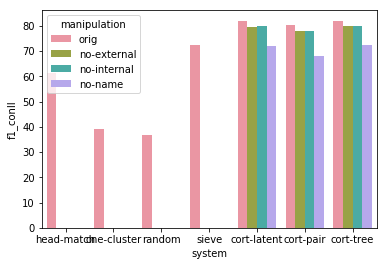

In [42]:
sns.set_palette('cubehelix', n_colors=3)
_ = sns.barplot(x='system', y='f1_conll', hue='manipulation', data=dev_gold_names_results)

In [43]:
dev_auto_names_results = results[(results['dataset'] == 'dev') & 
                                 ((results['auto_or_gold'] == 'gold') | results.auto_or_gold.isna()) &
                                 results['manipulation'].isin(['orig', 'no-external', 'no-internal', 'no-name'])]

In [44]:
dev_auto_names_results.sort_values(['system', 'manipulation'])

,auto_or_gold,dataset,f1_bcub,f1_ceafe,f1_conll,f1_muc,manipulation,mention_p,mention_r,system
38,gold,dev,76.56,74.81,79.670000,87.64,no-external,100,94.99,cort-latent
40,gold,dev,77.00,74.84,79.873333,87.78,no-internal,100,95.04,cort-latent
42,gold,dev,67.57,64.36,72.016667,84.12,no-name,100,95.15,cort-latent
54,gold,dev,79.38,77.43,82.046667,89.33,orig,100,95.53,cort-latent
94,gold,dev,75.33,73.62,78.013333,85.09,no-external,100,88.60,cort-pair
96,gold,dev,75.43,73.58,78.033333,85.09,no-internal,100,88.49,cort-pair
98,gold,dev,65.05,64.17,68.220000,75.44,no-name,100,79.13,cort-pair
110,gold,dev,77.79,76.01,80.153333,86.66,orig,100,89.89,cort-pair
150,gold,dev,77.10,75.51,80.116667,87.74,no-external,100,94.63,cort-tree
152,gold,dev,76.63,75.26,79.876667,87.74,no-internal,100,94.65,cort-tree


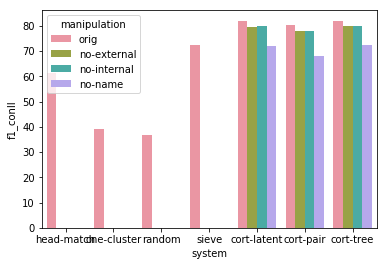

In [45]:
sns.set_palette('cubehelix', n_colors=3)
_ = sns.barplot(x='system', y='f1_conll', hue='manipulation', data=dev_auto_names_results)

### Results on gold datasets (with retraining)

In [63]:
dev_gold_results = results[((results['dataset'] == 'dev') & 
                            ((results['auto_or_gold'] == 'gold') | results.auto_or_gold.isna())) |
                           results['system'].isin(['student3', 'student2'])]

In [64]:
men_results = dev_gold_results[dev_gold_results['manipulation'].str.contains('^men_')].copy()
men_results['percentage'] = men_results['manipulation'].apply(lambda s: int(s[4:]))

In [65]:
# don't use sns.pointplot because its horizonal axis takes categorical values 
# instead of numerical values
# def line_plot(x, y, hue, data, title=None):
#     ax = sns.pointplot(x=x, y=y, hue=hue, data=data, palette='cubehelix')
#     ax.set_title(title)
    
def line_plot(x, y, hue, data, title=None, legend=False):
    hue_vals = data[hue].drop_duplicates()
    sns.set_palette('cubehelix', n_colors=len(hue_vals))
    for hue_val in hue_vals:
        data_hue = data[data[hue] == hue_val].sort_values(x)
        plt.plot(data_hue[x], data_hue[y])
    plt.ylabel('F1 (CoNLL)')
    plt.xlabel('Percentage')
    if title: plt.title(title)
    if legend: plt.legend(labels=hue_vals, loc='center left', bbox_to_anchor=(1, 0.5))

In [66]:
men_results[men_results.percentage == 100]

,auto_or_gold,dataset,f1_bcub,f1_ceafe,f1_conll,f1_muc,manipulation,mention_p,mention_r,system,percentage
7,gold,dev,24.01,6.38,39.270000,87.42,men_100,100,100.00,head-match,100
82,gold,dev,28.51,17.15,36.736667,64.55,men_100,100,100.00,random,100
85,gold,dev,24.01,6.38,39.270000,87.42,men_100,100,100.00,one-cluster,100
4,gold,dev,NaN,NaN,34.490000,NaN,men_100,100,100.00,sieve,100
28,gold,dev,38.62,29.81,45.346667,67.61,men_100,100,95.33,cort-latent,100
84,gold,dev,23.96,30.86,29.333333,33.18,men_100,100,40.77,cort-pair,100
140,gold,dev,25.72,8.73,39.693333,84.63,men_100,100,98.79,cort-tree,100
33,auto,dev+test,68.40,55.61,64.533333,69.59,men_100,100,100.00,student2,100
47,auto,dev+test,64.80,42.93,49.863333,41.86,men_100,100,100.00,student3,100


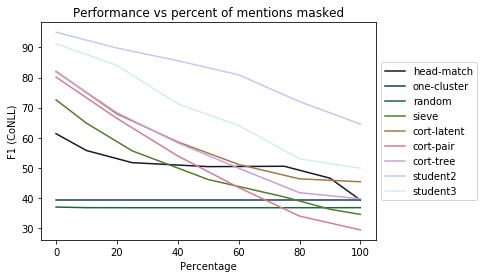

In [67]:
line_plot(x='percentage', y='f1_conll', hue='system', data=men_results, 
          title="Performance vs percent of mentions masked", legend=True)

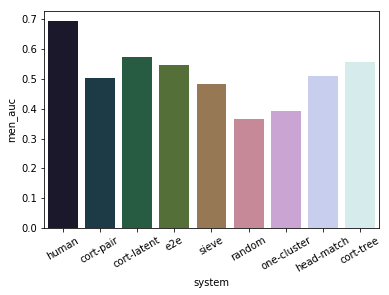

In [22]:
import scipy

def plot_auc(df, hue):
    df = df.sort_values('percentage')
    hue_vals = df[hue].drop_duplicates()
    auc_df = []
    for hue_val in hue_vals:
        my_df = df[df[hue] == hue_val]
        x = my_df['percentage'].values
        f = my_df['f1_conll'].values
        max_f = [100]*len(x)
        auc = scipy.integrate.simps(f, x) / scipy.integrate.simps(max_f, x)
        auc_df.append({'system': hue_val, 'men_auc': auc})
    sns.set_palette('cubehelix', n_colors=len(hue_vals))
    ax = sns.barplot(x='system', y='men_auc', data=pd.DataFrame(auc_df))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
    
plot_auc(men_results, 'system')

In [24]:
nonmen_results = dev_gold_results[dev_gold_results['manipulation'].str.contains('^nonmen_')].copy()
nonmen_results['percentage'] = nonmen_results['manipulation'].apply(lambda s: int(s[7:]))

In [25]:
nonmen_results[nonmen_results.percentage == 100]

,auto_or_gold,dataset,f1_bcub,f1_ceafe,f1_conll,f1_muc,manipulation,mention_p,mention_r,system,percentage
41,gold,dev,28.61,16.99,37.170000,65.91,nonmen_100,100,100.00,random,100
54,gold,dev,24.09,6.42,39.316667,87.44,nonmen_100,100,100.00,one-cluster,100
64,gold,dev,63.94,50.33,61.423333,70.00,nonmen_100,100,100.00,head-match,100
53,gold,dev,NaN,NaN,72.670000,NaN,nonmen_100,100,100.00,sieve,100
44,gold,dev,79.52,77.57,82.060000,89.09,nonmen_100,100,95.30,cort-latent,100
100,gold,dev,77.54,76.34,80.160000,86.60,nonmen_100,100,89.42,cort-pair,100
156,gold,dev,79.12,77.41,81.810000,88.90,nonmen_100,100,94.96,cort-tree,100


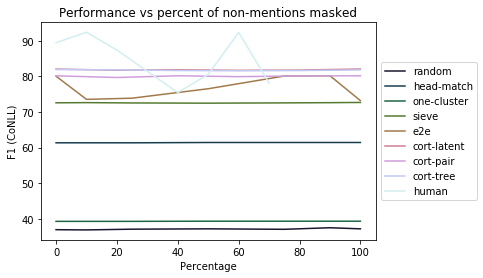

In [24]:
line_plot(x='percentage', y='f1_conll', hue='system', data=nonmen_results,
          title="Performance vs percent of non-mentions masked", legend=True)

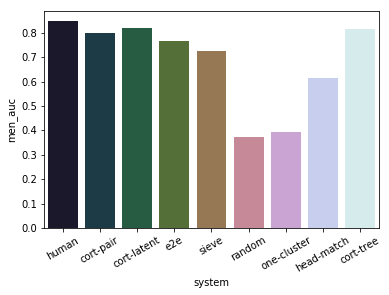

In [25]:
plot_auc(nonmen_results, 'system')

In [26]:
def plot_context_plots(df):
    results = df[df['manipulation'].str.contains('^(?:non)?men_')].copy()
    results['percentage'] = results['manipulation'].apply(lambda s: int(re.sub('(?:non)?men_', '', s)))
    results['manipulation'] = results['manipulation'].apply(lambda s: re.sub('_\d+', '', s))
    results = results.sort_values(['manipulation', 'percentage'])
    hues = list(results['system'].drop_duplicates())
    g = sns.FacetGrid(results, col="manipulation", hue="system", hue_order=hues, palette='cubehelix')
    g.map(plt.plot, 'percentage', 'f1_conll').add_legend()

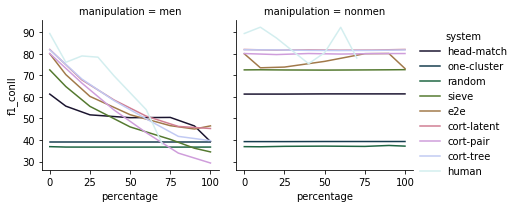

In [27]:
plot_context_plots(dev_gold_results)

### Results on auto datasets (without retraining)

In [28]:
dev_auto_results = results[(results['dataset'] == 'dev') & 
                           ((results['auto_or_gold'] == 'auto') | results.auto_or_gold.isna())]

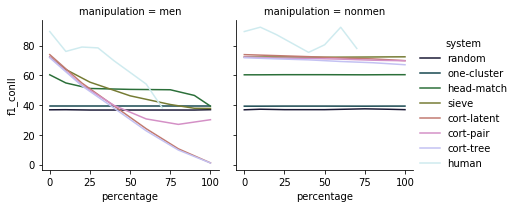

In [29]:
plot_context_plots(dev_auto_results)

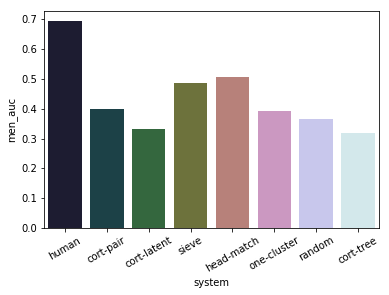

In [30]:
men_auto_results = dev_auto_results[dev_auto_results['manipulation'].str.contains('^men_')].copy()
men_auto_results['percentage'] = men_auto_results['manipulation'].apply(lambda s: int(s[4:]))
plot_auc(men_auto_results, 'system')